Use Python to calculate the Sharpe ratio for a portfolio
The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility (in the stock market, volatility represents the risk of an asset). It allows us to use mathematics in order to quantify the relationship between the mean daily return and then the volatility (or the standard deviation) of daily returns.
Simply put, the greater the Sharpe ratio, the more attractive the risk-adjusted return is.
This calculation will also be useful to help us find the “best” possible allocation for each stock in a portfolio, depending on our risk preferences. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amzn=pd.read_csv(r'C:\Users\Administrateur\Downloads\AMZN.csv', index_col = 'Date', parse_dates = True)
aapl=pd.read_csv(r'C:\Users\Administrateur\Downloads\AAPL.csv', index_col = 'Date', parse_dates = True)
cisco=pd.read_csv(r'C:\Users\Administrateur\Downloads\CSCO.csv', index_col = 'Date', parse_dates = True)
ibm=pd.read_csv(r'C:\Users\Administrateur\Downloads\IBM.csv', index_col = 'Date', parse_dates = True)


In [3]:
amzn=amzn.copy()
aapl=aapl.copy()
cisco=cisco.copy()
ibm=ibm.copy()

In [4]:
print(amzn.shape, cisco.shape, aapl.shape, ibm.shape)

(5930, 6) (7761, 6) (10082, 6) (14835, 6)


In [5]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Norm return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

 We assume our portfolio will consist of: 35% for Apple, 25% for Cisco, and 20% each for IBM and Amazon.

In [6]:
for stock_df, allocation in zip((aapl, cisco, ibm, amzn),[.35,.25,.2,.2]):
    stock_df['Allocation'] = stock_df['Norm return'] * allocation

The final for loop will add a column with the position value. Let’s assume out portfolio size is 10k in the first day. We simply multiply it with the Allocation column which is already adjusted to the normalized return.

In [7]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position'] = stock_df['Allocation']*10000

This is what the four dataframes look like now. For each day, you know exactly what’s the value of your position for each of the four stocks.

In order to get all our positions in one single table, we can isolate the column “Position” from each stock and merge it in a new dataframe called “portf_val”. We then rename the columns to match each stock.

In [8]:
all_pos = [aapl['Position'], cisco['Position'], ibm['Position'], amzn['Position']]
portf_val = pd.concat(all_pos, axis=1)
portf_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [9]:
portf_val['Total Pos'] = portf_val.sum(axis=1)
portf_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
1962-01-02,NaN,NaN,2000.000000,NaN,2000.000000
1962-01-03,NaN,NaN,2017.481065,NaN,2017.481065
1962-01-04,NaN,NaN,1997.375355,NaN,1997.375355
1962-01-05,NaN,NaN,1958.041338,NaN,1958.041338
1962-01-08,NaN,NaN,1921.328725,NaN,1921.328725


In [10]:
index_with_nan = portf_val.index[portf_val.isnull().any(axis=1)]
index_with_nan

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '1997-05-01', '1997-05-02', '1997-05-05', '1997-05-06',
               '1997-05-07', '1997-05-08', '1997-05-09', '1997-05-12',
               '1997-05-13', '1997-05-14'],
              dtype='datetime64[ns]', name='Date', length=8905, freq=None)

In [11]:
portf_val.drop(index_with_nan,0, inplace=True)
portf_val


,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
1997-05-15,4.733584e+03,2.256170e+05,28942.101672,2.000000e+03,2.612927e+05
1997-05-16,4.600238e+03,2.211227e+05,28297.107866,1.765958e+03,2.557860e+05
1997-05-19,4.533566e+03,2.191002e+05,28089.048834,1.744681e+03,2.534675e+05
1997-05-20,4.600238e+03,2.314597e+05,28921.308735,1.670213e+03,2.666515e+05
1997-05-21,4.500229e+03,2.364035e+05,29150.183396,1.457447e+03,2.715114e+05
...,...,...,...,...,...
2020-11-30,4.155696e+06,1.846542e+06,133468.974568,3.235446e+06,9.371153e+06
2020-12-01,4.283805e+06,1.868862e+06,133079.985758,3.288593e+06,9.574340e+06
2020-12-02,4.296372e+06,1.883885e+06,134657.581080,3.271691e+06,9.586605e+06


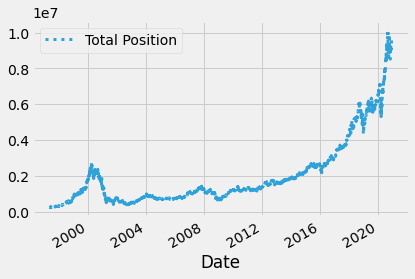

In [12]:
plt.style.use('fivethirtyeight')
portf_val['Total Pos'].plot(label= 'Total Position', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

It actually performed really well

<AxesSubplot:xlabel='Date'>

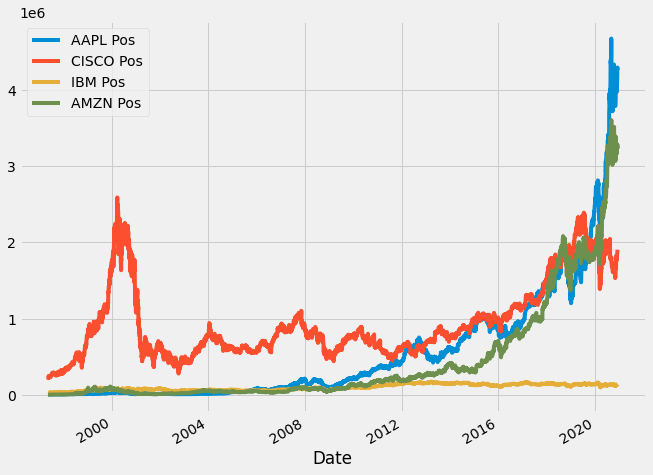

In [13]:
portf_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

We can see Amazon (green) performed great but IBM (yellow) on the other hand, was not so good. Here’s a good example of why it is important to diversify!

Let’s see how much was our cumulative return.

In [14]:
cumulative_return = 100 * ( portf_val ['Total Pos'] [-1 ] / portf_val ['Total Pos'] [ 0 ] -1)

print('cumulative return was {:.2f}% '.format(cumulative_return))


cumulative return was 3550.94% 


126,5% is a very decent return! We’ll add another column to our portf_val dataframe. This time we will add the percentage change in each day — hence the 1 in the formula below. The daily return will be important to calculate the Sharpe ratio.



In [15]:
portf_val['Daily Return'] = portf_val['Total Pos'].pct_change(1)

In [16]:
portf_val 


,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
1997-05-15,4.733584e+03,2.256170e+05,28942.101672,2.000000e+03,2.612927e+05,NaN
1997-05-16,4.600238e+03,2.211227e+05,28297.107866,1.765958e+03,2.557860e+05,-0.021075
1997-05-19,4.533566e+03,2.191002e+05,28089.048834,1.744681e+03,2.534675e+05,-0.009064
1997-05-20,4.600238e+03,2.314597e+05,28921.308735,1.670213e+03,2.666515e+05,0.052015
1997-05-21,4.500229e+03,2.364035e+05,29150.183396,1.457447e+03,2.715114e+05,0.018226
...,...,...,...,...,...,...
2020-11-30,4.155696e+06,1.846542e+06,133468.974568,3.235446e+06,9.371153e+06,0.007616
2020-12-01,4.283805e+06,1.868862e+06,133079.985758,3.288593e+06,9.574340e+06,0.021682
2020-12-02,4.296372e+06,1.883885e+06,134657.581080,3.271691e+06,9.586605e+06,0.001281


Now it’s time to calculate the Sharpe ratio. The formula is pretty simple, and intuitive: remove from the expected portfolio return, the rate you would get from a risk free investment. Divide the result by the portfolio’s standard deviation. Nowadays, since the interest rates are so low, it is commonly assumed that the risk free rate is zero, since you get very little money if you leave it in a savings account (a generic example of a risk free asset).

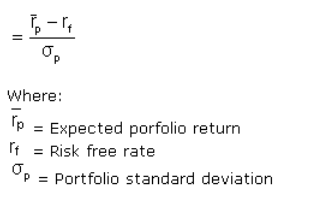

So the formula will be just the mean of the daily returns, divided by the standard deviation of the daily returns. In Python it will look like this:

In [17]:
Sharpe_Ratio = portf_val['Daily Return'].mean() / portf_val['Daily Return'].std()
Sharpe_Ratio

0.03821852835479206

To finish this article we need to annualize the Sharpe ratio, since we calculated it from daily values. There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.

In [18]:
A_Sharpe_Ratio = (252**0.5)* Sharpe_Ratio
A_Sharpe_Ratio

0.6067003290099019